# Pospischil sPYr Example

### Install dependencies for ACT and setup environment

In [4]:
!pip install act-neuron

import os
import sys

from act import simulator, analysis
from IPython.display import Image
import numpy as np

# Download the repository with all relevant model files if in google colab
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !rm -rf ./ACT
    !git clone https://github.com/V-Marco/ACT
    base_dir = "./ACT"
else:
    base_dir = "../.."

### Define a config file

These settings are modifiable by the user of ACT. Tune your own cells by altering values here.

In [5]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/Pospischil/sPyr/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/Pospischil/sPyr/seg_modfiles"),
        "name": "sPYr",
    },
    "simulation_parameters": {
        "h_v_init": -60.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "g_pas", "low": 5.0e-06, "high": 2.0e-05},
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [1e-5, 0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["g_pas"],
            "voltage": [-100, -65],
            "time": [0, 500],
        },
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_Pospischil_sPYr", "produce_plots": True},
    "run_mode": "segregated",  # "original", "segregated"
}

### Run the simulation

In [6]:
simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")



(2023-09-03 17:50:04.704145)-[START]
(2023-09-03 17:50:04.704234)-[INFO]: Number of amplitudes: 120
(2023-09-03 17:50:04.712806)-[INFO]: Mod files already loaded. Continuing.
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-03 17:50:48.229596)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-03 17:50:48.279709)-[INFO]: Matching 12 amplitudes.
(2023-09-03 17:51:31.843199)-[INFO]: Total amplitudes matched: 8/12.
(2023-09-03 17:52:12.378754)-[INFO]: Total amplitudes matched: 16/12.
(2023-09-03 17:52:12.383222)-[INFO]: Matched amplitudes: [0.6 0.8 0.9 1.7 2.5 3.1 3.2 3.4 3.6 4.1 4.2 4.3 4.7 5.  5.4 6.3]
(2023-09-03 17:52:12.638955)-[INFO]: Training a model with SGD optimizer and lr = 1e-8.
(2023-09-03 17:52:12.639199)-[INFO]: Number of trainable parameters: 20546305
(2023-09-03 17:52:12.643064)-[EPOCH 0]: l1_loss = 1e-

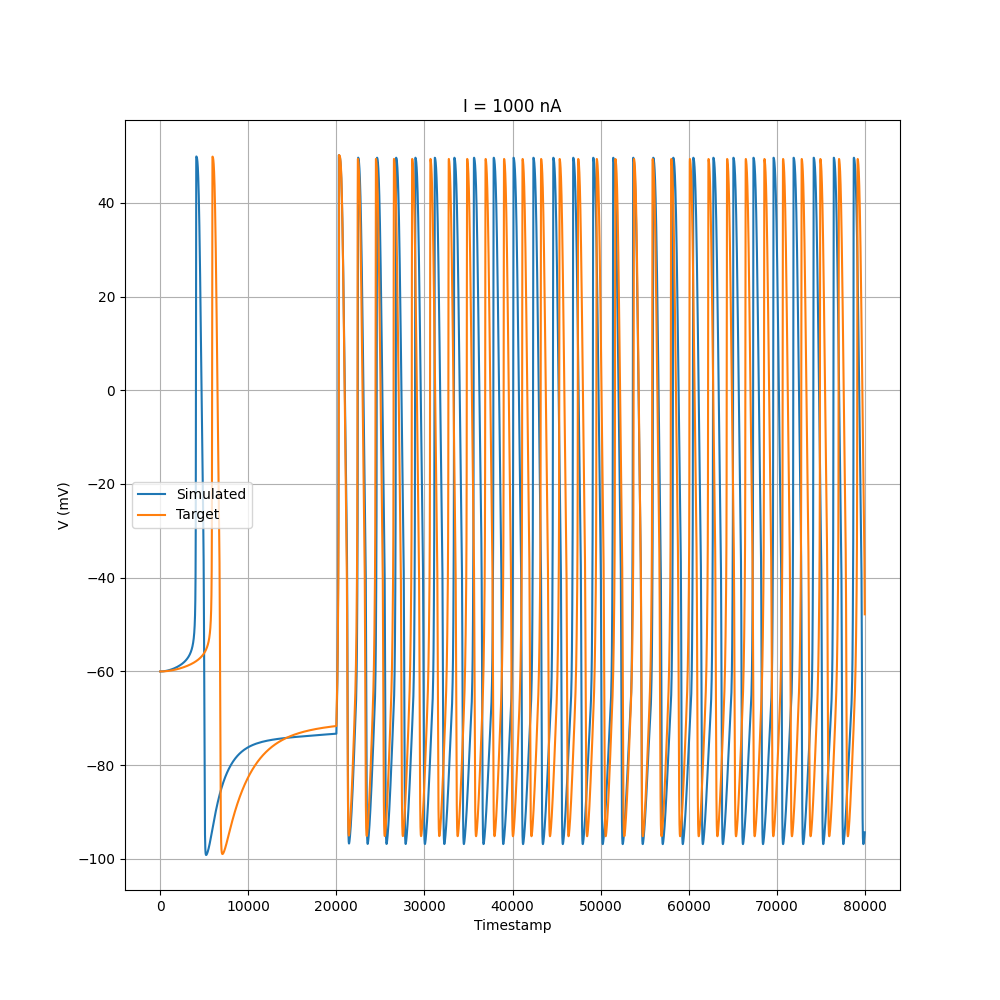

In [7]:
Image(filename="./output_Pospischil_sPYr/segregated/1000nA.png")

In [8]:
analysis.print_run_stats(config)

output_Pospischil_sPYr : segregated
Med MSE: 3053.0244 (7251.1539)
Med Corr: 0.2118 (0.2898)

Predicted values:
      g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.000016    0.099995   0.007343   0.00006   0.001999
Target values:
     g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.00001        0.05      0.005   0.00003      0.001
Error:
      g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.000006    0.049995   0.002343   0.00003   0.000999

Pred MAE: 0.0107

Passive properties:
{
  "leak_conductance_variable": null,
  "leak_reversal_variable": null,
  "r_in": 125.23857116699219,
  "tau": 34.275,
  "v_rest": -73.27852630615234
}
----------



### Compare with the non-segregated approach

In [9]:
# Update our config to use the original mod files
config["cell"]["modfiles_folder"] = os.path.join(
    base_dir, "data/Pospischil/sPyr/orig_modfiles"
)

# Change the run mode to original (instead of segregated)
config["run_mode"] = "original"

# Re-run

simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating cadecay_destexhe.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/cadecay_destexhe.c
Translating HH_traub.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/HH_traub.c
Notice: VERBATIM blocks are not thread safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
Translating IM_cortex.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IM_cortex.c
Thread Safe
Translating IT_huguenard.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IT_huguenard.c
Thread Safe


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/orig_modfiles/../../data/Pospischil/sPyr/orig_modfiles/IT_huguenard.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/cadecay_destexhe.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/HH_traub.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/IM_cortex.mod
 -> NMODL ../../../data/Pospischil/sPyr/orig_modfiles/IT_huguenard.mod
 -> Compiling cadecay_destexhe.c
 -> Compiling HH_traub.c
 -> Compiling IM_cortex.c
 -> Compiling IT_huguenard.c
 => LINKING shar

NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")


Successfully created x86_64/special

(2023-09-03 18:00:41.369858)-[START]
(2023-09-03 18:00:41.369901)-[INFO]: Number of amplitudes: 120
(2023-09-03 18:00:41.378571)-[INFO]: Mod files already loaded. Continuing.
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-03 18:01:24.477568)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Skipping analytical setting of passive properties, no cell passive_properties specified in config.
(2023-09-03 18:01:24.540947)-[INFO]: Matching 12 amplitudes.
(2023-09-03 18:02:07.828889)-[INFO]: Total amplitudes matched: 5/12.
(2023-09-03 18:02:49.067263)-[INFO]: Total amplitudes matched: 10/12.
(2023-09-03 18:03:28.599945)-[INFO]: Total amplitudes matched: 16/12.
(2023-09-03 18:03:28.604107)-[INFO]: Matched amplitudes: [0.1 0.8 1.  1.3 1.4 1.6 3.1 3.4 3.9 4.4 4.8 4.9 5.1 6.3 8.4 9.6]
(2023-09-03 18:03:28.787354)-[INFO]: Training a model with SGD optimizer and lr = 1e-8.
(2023-09-03 18:03:28.7874

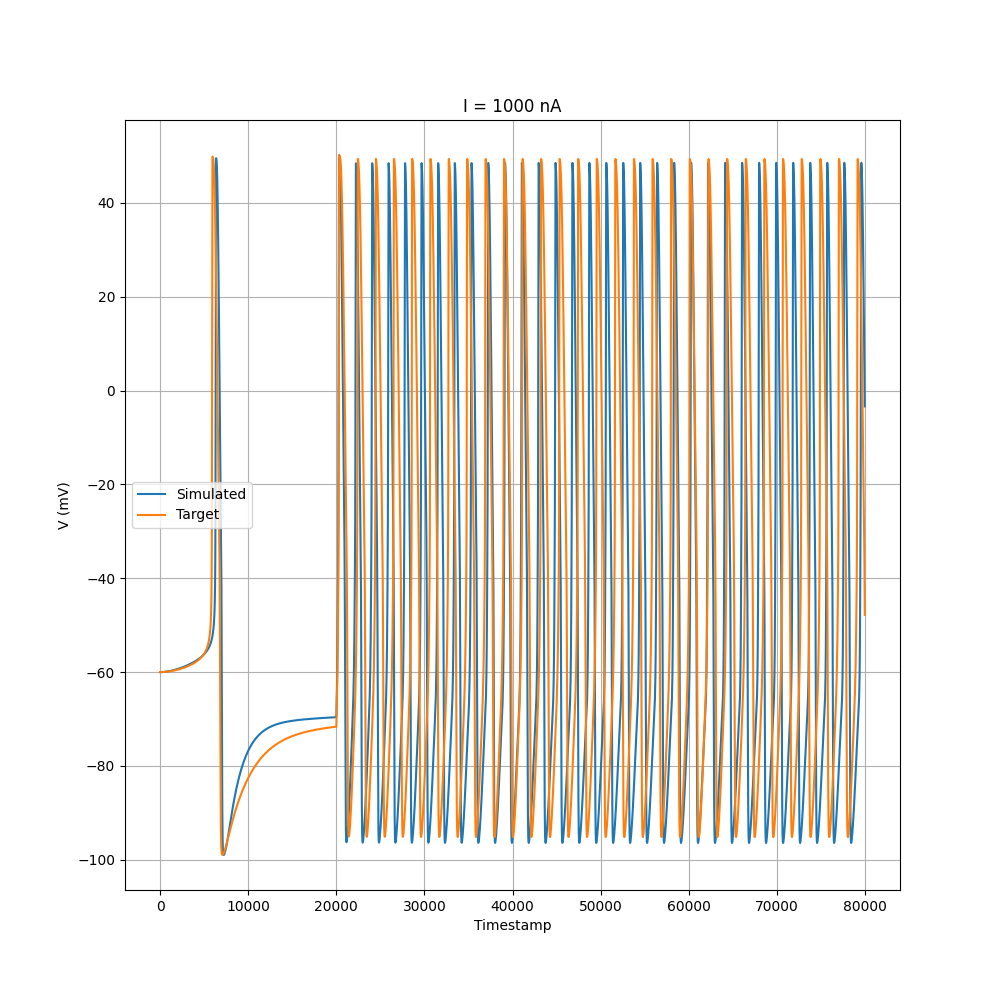

In [10]:
Image(filename="./output_Pospischil_sPYr/original/1000nA.png")

In [11]:
analysis.print_run_stats(config)

output_Pospischil_sPYr : original
Med MSE: 2814.8042 (11054.6103)
Med Corr: 0.2002 (0.3024)

Predicted values:
      g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.000018    0.032396   0.009997  0.000059   0.001989
Target values:
     g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.00001        0.05      0.005   0.00003      0.001
Error:
      g_pas  gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0  0.000008   -0.017604   0.004997  0.000029   0.000989

Pred MAE: 0.0047

Passive properties:
{
  "leak_conductance_variable": null,
  "leak_reversal_variable": null,
  "r_in": 128.3745574951172,
  "tau": 35.475,
  "v_rest": -69.61241912841797
}
----------



### Analytical setting of passive properties

In this section, let's set the passive properties for the cell so they can be analytically determined instead of using a model network.

In [12]:
config = {
    "cell": {
        "hoc_file": os.path.join(base_dir, "data/Pospischil/sPyr/template.hoc"),
        "modfiles_folder": os.path.join(base_dir, "data/Pospischil/sPyr/seg_modfiles"),
        "name": "sPYr",
        "passive_properties": {
            "v_rest": -60,
            "r_in": 393.45,
            "tau": 117.425,
            "leak_conductance_variable": "g_pas",  # eg: g_leak
            "leak_reversal_variable": "e_pas",  # eg: e_leak
        },
    },
    "simulation_parameters": {
        "h_v_init": -60.0,  # (mV)
        "h_tstop": 2000,  # (ms)
        "h_i_delay": 500,  # (ms)
        "h_i_dur": 1500,  # (ms)
        "h_dt": 0.025,
    },
    "optimization_parameters": {
        "amps": list(np.arange(-2, 10, 0.1)),
        "params": [
            {"channel": "gnabar_hh2", "low": 2.5e-02, "high": 1.0e-01},
            {"channel": "gkbar_hh2", "low": 2.5e-03, "high": 1.0e-02},
            {"channel": "gkbar_im", "low": 1.5e-05, "high": 6.0e-05},
            {"channel": "gcabar_it", "low": 5.0e-04, "high": 2.0e-03},
        ],
        "target_V": None,  # Target voltages
        "target_params": [0.05, 0.005, 3e-5, 0.001],
        "num_repeats": 3,
        "num_amps_to_match": 12,
        "num_epochs": 5000,
    },
    "summary_features": {
        "spike_threshold": 20,  # (mV)
        # Target-sim match conditions (max abs diff between sim and target)
        "mc_num_spikes": 1,
        "mc_interspike_time": 200,  # (ms)
        "mc_min_v": 1,  # (mV)
        "mc_mean_v": 2,  # (mV)
        "mc_max_v": 1,  # (mV)
    },
    "segregation": [
        {
            "params": ["gnabar_hh2", "gkbar_hh2", "gkbar_im", "gcabar_it"],
            "voltage": [-65, 100],
            "time": [0, 2000],
        },
    ],
    "output": {"folder": "output_Pospischil_sPYr_p", "produce_plots": True},
    "run_mode": "segregated",  # "original", "segregated"
}

In [13]:
simulator.run(config)

/home/tyler/neuro-venv/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating cadecay_destexhe.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/cadecay_destexhe.c
Translating HH_traub.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/HH_traub.c
Thread Safe
Translating IM_cortex.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IM_cortex.c
Notice: VERBATIM blocks are not thread safe
Notice: This mechanism cannot be used with CVODE
Thread Safe
Translating IT_huguenard.mod into /home/tyler/git_stage/ACT/examples/Pospischil_sPYr/x86_64/IT_huguenard.c
Thread Safe


INFO : Using neuron-nightly Package (Developer Version)
/home/tyler/git_stage/ACT/examples/Pospischil_sPYr
Mod files: "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod" "../../data/Pospischil/sPyr/seg_modfiles/../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/cadecay_destexhe.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/HH_traub.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IM_cortex.mod
 -> NMODL ../../../data/Pospischil/sPyr/seg_modfiles/IT_huguenard.mod
 -> Compiling cadecay_destexhe.c
 -> Compiling HH_traub.c
 -> Compiling IM_cortex.c
 -> Compiling IT_huguenard.c
 => LINKING shared library .

NEURON: The user defined name already exists: cad
 near line 0
 ^
        nrn_load_dll("./x86_64/....")


Successfully created x86_64/special

(2023-09-03 18:14:48.774985)-[START]
(2023-09-03 18:14:48.775045)-[INFO]: Number of amplitudes: 120
(2023-09-03 18:14:48.788545)-[INFO]: Mod files already loaded. Continuing.
Setting e_pas = -60
Setting sPYr[60].soma[0].g_pas = 0.00000878
Setting sPYr[60].soma[0].cm = 1.03081014
(2023-09-03 18:15:31.967689)-[INFO]: Target voltage shape: torch.Size([120, 80000])
Setting e_pas = -60
Setting sPYr[61].soma[0].g_pas = 0.00000878
Setting sPYr[61].soma[0].cm = 1.03081014
(2023-09-03 18:15:32.019055)-[INFO]: Matching 12 amplitudes.
(2023-09-03 18:16:16.225937)-[INFO]: Total amplitudes matched: 27/12.
(2023-09-03 18:16:16.231010)-[INFO]: Matched amplitudes: [-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.8  1.   1.4  1.6  1.8  5.   6.6]
(2023-09-03 18:16:16.496878)-[INFO]: Training a model with SGD optimizer and lr = 1e-8.
(2023-09-03 18:16:16.496981)-[INFO]: Number of trainable parameters: 20547076
(2

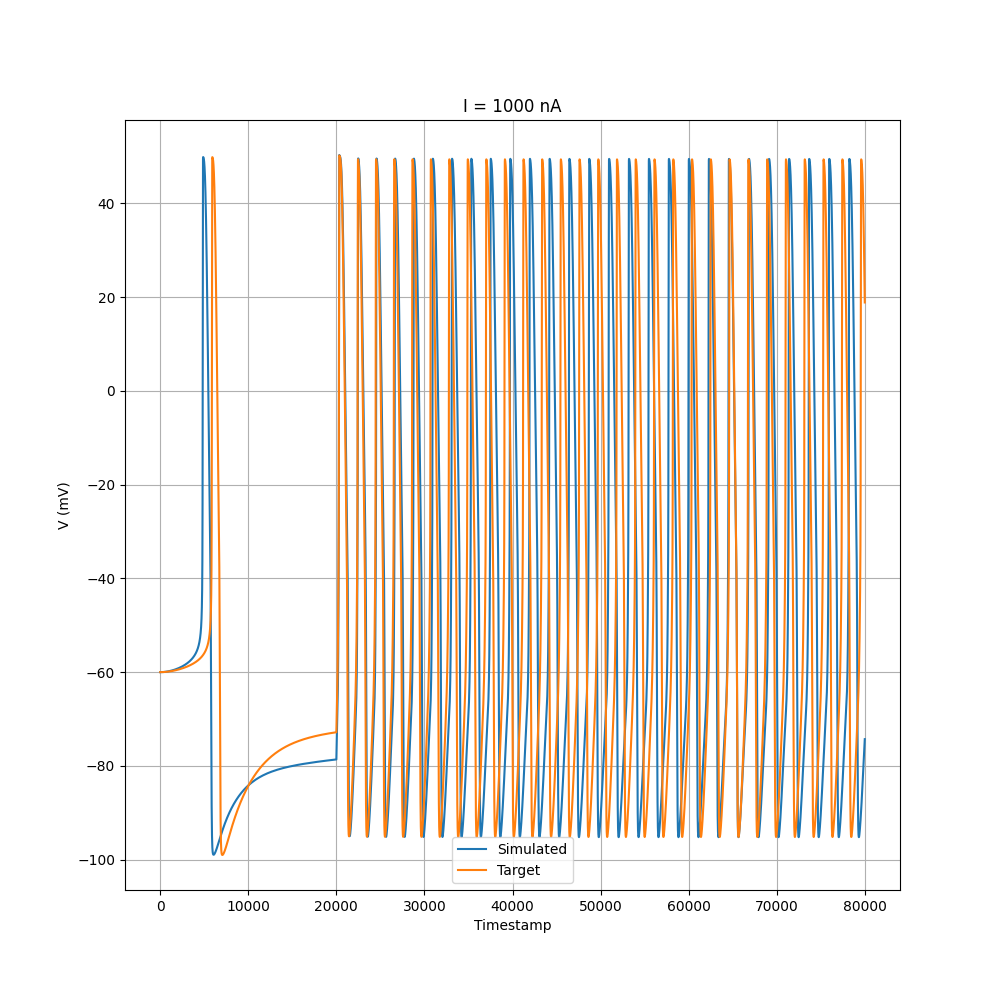

In [14]:
Image(filename="./output_Pospischil_sPYr_p/segregated/1000nA.png")

In [15]:
analysis.print_run_stats(config)

output_Pospischil_sPYr_p : segregated
Med MSE: 1986.3703 (1037.5410)
Med Corr: 0.3580 (0.2591)

Predicted values:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0     0.05915   0.004651   0.00006    0.00168
Target values:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0        0.05      0.005   0.00003      0.001
Error:
   gnabar_hh2  gkbar_hh2  gkbar_im  gcabar_it
0     0.00915  -0.000349   0.00003    0.00068

Pred MAE: 0.0026

Passive properties:
{
  "leak_conductance_variable": "g_pas",
  "leak_reversal_variable": "e_pas",
  "r_in": 208.73794555664062,
  "tau": 64.625,
  "v_rest": -78.62430572509766
}
----------



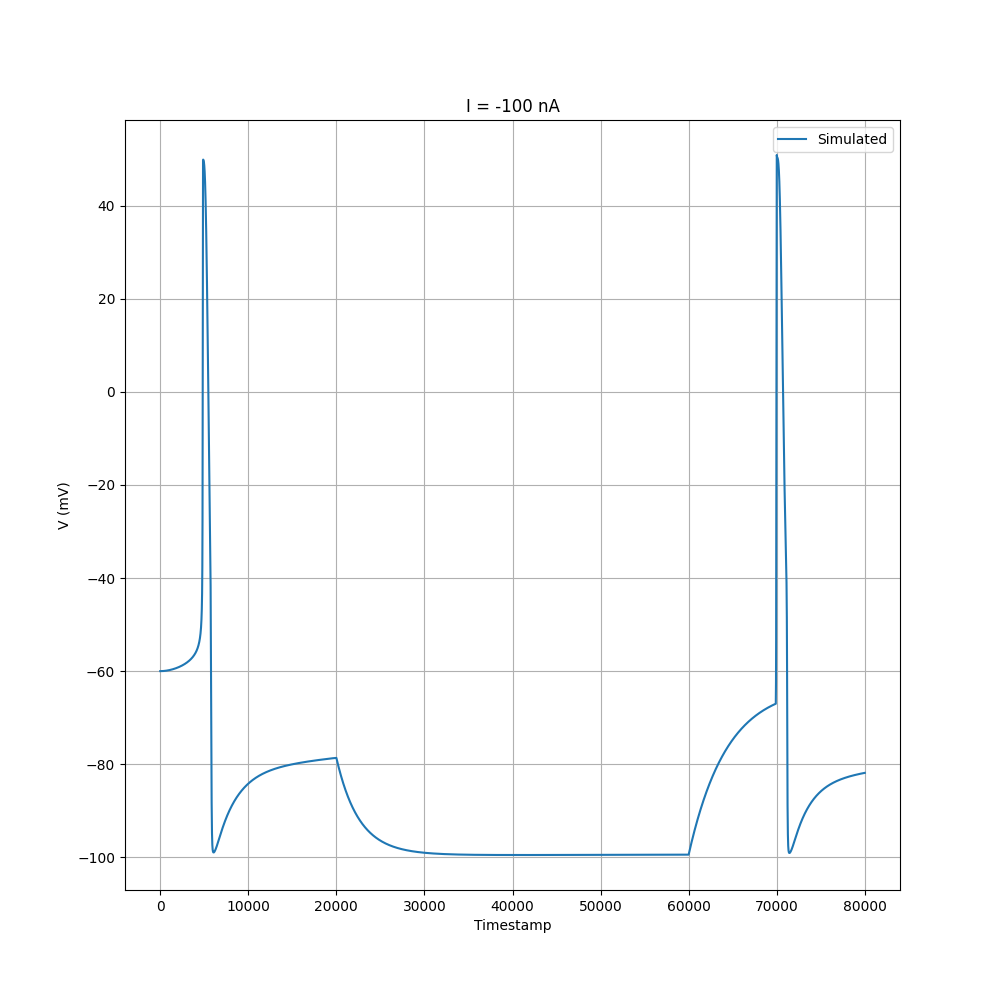

In [16]:
Image(filename="./output_Pospischil_sPYr_p/segregated/passive_-100nA.png")